In [5]:
import os
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt
import cv2
from load_img import Load_from_Folder, Load_Images
from evaluate import *
from color_space import *
from LANCZOS import *
from util import *

root = '/Users/alex/Desktop/evl/'


In [6]:
def evl(kk = (0,1),
        input_ = 'L/256',
        output_ = 'lena_256',
        name='lena_evl_256_color.pkl'):
    
    H, W = 256*2, 256*2
    bpg_420, bpg_444 = [], []
    h264_420, h264_444 = [], []
    hevc_420, hevc_444 = [], []
    jpg_420, jpg_prog = [], []
    for k in range(kk[0],kk[1]):
        y = cv2.imread('/Users/alex/Desktop/'+input_+'/'+str(k)+'.png')
        #print(y.shape)
        for i in range(30, 52):

            #a = [i, PSNR(cv2.imread('/Users/alex/Desktop/'+output_+'/bpg_420/'+str(k)+'_'+str(i)+'.png'), y), 
            #     os.stat('/Users/alex/Desktop/'+output_+'/bpg_420/'+str(k)+'_'+str(i)+'.bpg').st_size*8/H/W]
            #bpg_420.append(a)
            #a = [i, PSNR(cv2.imread('/Users/alex/Desktop/'+output_+'/bpg_444/'+str(k)+'_'+str(i)+'.png'), y), 
            #     os.stat('/Users/alex/Desktop/'+output_+'/bpg_444/'+str(k)+'_'+str(i)+'.bpg').st_size*8/H/W]
            #bpg_444.append(a)

            a = [i, PSNR(cv2.imread('/Users/alex/Desktop/'+output_+'/h264_420/'+str(k)+'_'+str(i)+'.png'), y), 
                 os.stat('/Users/alex/Desktop/'+output_+'/h264_420/'+str(k)+'_'+str(i)+'.mp4').st_size*8/H/W]
            h264_420.append(a)
            a = [i, PSNR(cv2.imread('/Users/alex/Desktop/'+output_+'/h264_444/'+str(k)+'_'+str(i)+'.png'), y), 
                 os.stat('/Users/alex/Desktop/'+output_+'/h264_444/'+str(k)+'_'+str(i)+'.mp4').st_size*8/H/W]
            h264_444.append(a)

            a = [i, PSNR(cv2.imread('/Users/alex/Desktop/'+output_+'/hevc_420/'+str(k)+'_'+str(i)+'.png'), y), 
                 os.stat('/Users/alex/Desktop/'+output_+'/hevc_420/'+str(k)+'_'+str(i)+'.hevc').st_size*8/H/W]
            hevc_420.append(a)
            a = [i, PSNR(cv2.imread('/Users/alex/Desktop/'+output_+'/hevc_444/'+str(k)+'_'+str(i)+'.png'), y), 
                 os.stat('/Users/alex/Desktop/'+output_+'/hevc_444/'+str(k)+'_'+str(i)+'.hevc').st_size*8/H/W]
            hevc_444.append(a)


    for k in range(kk[0],kk[1]):
        y = cv2.imread('/Users/alex/Desktop/'+input_+'/'+str(k)+'.png')
        for i in range(1, 31):        
            a = [i, PSNR(cv2.imread('/Users/alex/Desktop/'+output_+'/jpg420/'+str(k)+'_'+str(i)+'.bmp'), y), 
                 os.stat('/Users/alex/Desktop/'+output_+'/jpg420/'+str(k)+'_'+str(i)+'.jpg').st_size*8/H/W]
            jpg_420.append(a)
            a = [i, PSNR(cv2.imread('/Users/alex/Desktop/'+output_+'/jpgprog/'+str(k)+'_'+str(i)+'.bmp'), y), 
                 os.stat('/Users/alex/Desktop/'+output_+'/jpgprog/'+str(k)+'_'+str(i)+'.jpg').st_size*8/H/W]
            jpg_prog.append(a)

    d = {#
         #'bpg_420':bpg_420, 
         #'bpg_444':bpg_444,
         'h264_420':h264_420, 
         'h264_444':h264_444,
         'hevc_420':hevc_420, 
         'hevc_444':hevc_444,
         'jpg_420':jpg_420, 
         'jpg_prog':jpg_prog}
    with open(name,'wb') as f:
        pickle.dump(d, f, 4)

def avg(x, nimg, trunc=(0,100)):
    a = np.array(x).reshape(nimg, -1, 3)
    return np.mean(a[:,:,2], axis=0)[trunc[0]:trunc[1]], np.mean(a[:,:,1], axis=0)[trunc[0]:trunc[1]]

def plot(d, nimg, plotbpg=False):
    if plotbpg==True:
        a, b = avg(d['bpg_420'], nimg)
        c = 'bpg 420'
        plt.plot(a, b, label=c)
        a, b = avg(d['bpg_444'], nimg)
        c = 'bpg 444'
        plt.plot(a, b, label=c)

    a, b = avg(d['hevc_420'], nimg)
    c = 'hevc 420'
    #plt.plot(a, b, label=c)
    a, b = avg(d['hevc_444'], nimg)
    c = 'hevc 444'
    #plt.plot(a, b, label=c)

    a, b = avg(d['h264_420'], nimg)
    c = 'h264 420'
    plt.plot(a, b, label=c)
    a, b = avg(d['h264_444'], nimg)
    c = 'h264 444'
    plt.plot(a, b, label=c)

    a, b = avg(d['jpg_420'], nimg)
    c = 'jpg 420'
    plt.plot(a, b, label=c)
    a, b = avg(d['jpg_prog'], nimg)
    c = 'jpg progressive'
    plt.plot(a, b, label=c)
    
def find(ref, target, sign=1):
    m, idx = 10, -1
    for j in range(len(target)):
        if m > abs(ref[0]-target[j][2]):
            idx = j
            m = abs(ref[0]-target[j][2])
    return target[idx][1], target[idx][2], target[idx][0]

In [ ]:
evl(kk = (0,186),
        input_ = 'test_512',
        output_ = 'tmp',
        name='test_512_color.pkl')

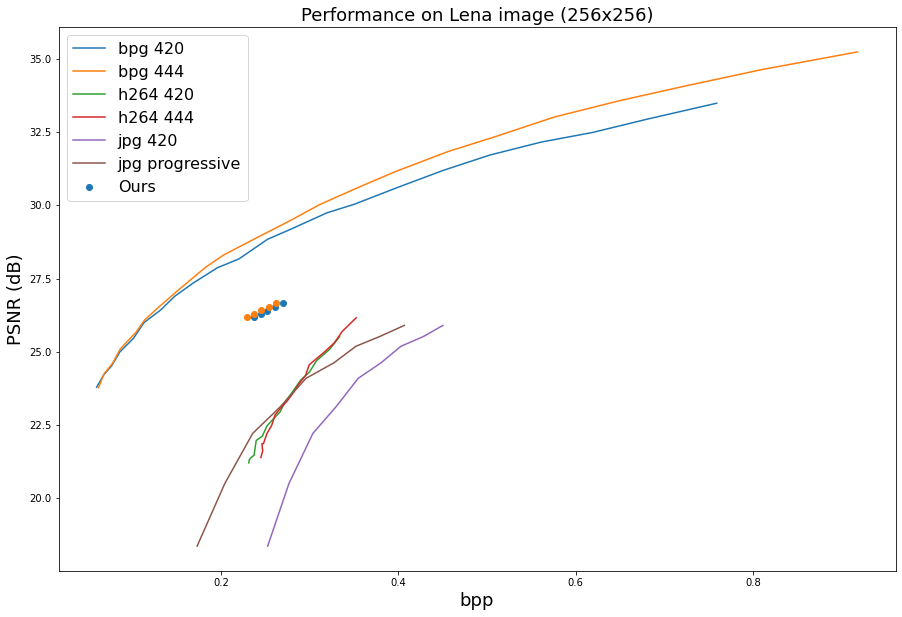

In [49]:
with open(root+'lena_evl_256_color.pkl', 'rb') as f:
    d = pickle.load(f)
    
our = np.array([[0.23696898,26.19204],[0.24522399,26.29658],[0.25167846,26.38153],[0.26036071,26.51287],[0.26918029,26.66041]])
plt.figure(figsize=(15,10))

plt.scatter(our[:,0], our[:,1], label='Ours')
a = np.array([[0.229126,26.17798],[0.237015,26.28758],[0.245331,26.41784],[0.253952,26.52263],[0.261841,26.67649]])
plt.scatter(a[:,0], a[:,1])
plot(d, 1, True)
plt.title('Performance on Lena image (256x256)',fontsize=18)
plt.xlabel('bpp',fontsize=18)
plt.ylabel('PSNR (dB)',fontsize=18)
plt.legend(prop={'size': 16})
plt.show()



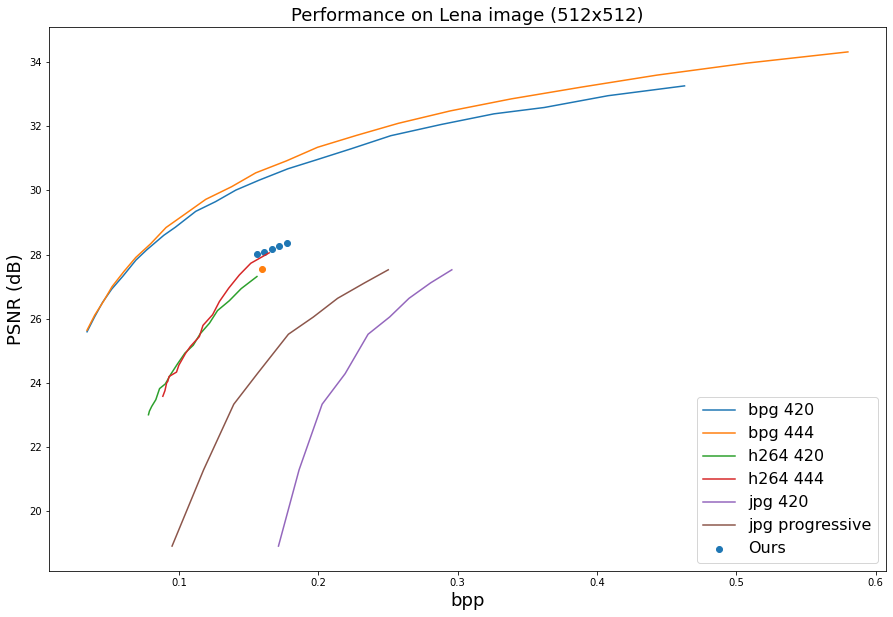

In [41]:
with open(root+'lena_evl_512_color.pkl', 'rb') as f:
    d = pickle.load(f)
    
our = np.array([[0.15568923, 28.01017], [0.16085434, 28.09569],[0.1664772, 28.17509],[0.17167663, 28.26662],[0.17729949, 28.36619]])
plt.figure(figsize=(15,10))

plt.scatter(our[:,0], our[:,1], label='Ours')
plt.scatter(0.159401,27.54995)
plot(d, 1, True)
plt.title('Performance on Lena image (512x512)',fontsize=18)
plt.xlabel('bpp',fontsize=18)
plt.ylabel('PSNR (dB)',fontsize=18)
plt.legend(prop={'size': 16})
plt.show()




In [6]:
for  i in range(1):
    print(our[i], find(our[i], d['h264_444']))
    print(our[i], find(our[i], d['jpg_prog']))
    print(our[i], find(our[i], d['bpg_444']))

[ 0.15568923 28.01017   ] (27.733383334804724, 0.151519775390625, 36)
[ 0.15568923 28.01017   ] (24.29110501822567, 0.15618896484375, 5)
[ 0.15568923 28.01017   ] (30.548001946515797, 0.154998779296875, 40)


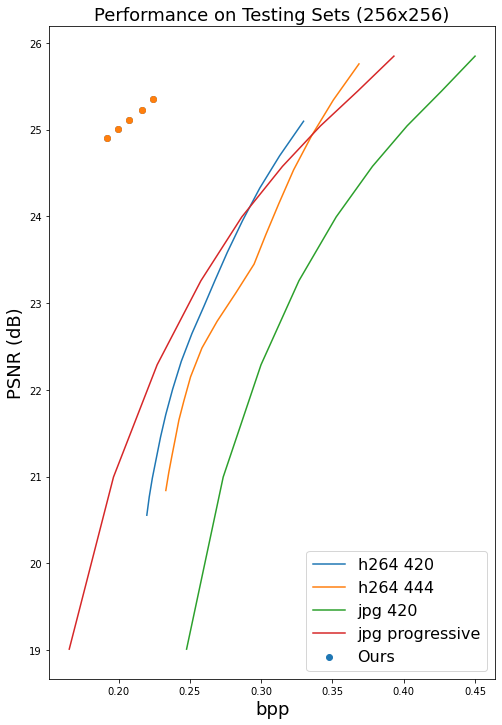

In [50]:
def plot(d, nimg, plotbpg=False):
    if plotbpg==True:
        a, b = avg(d['bpg_420'], nimg)
        c = 'bpg 420'
        plt.plot(a, b, label=c)
        a, b = avg(d['bpg_444'], nimg)
        c = 'bpg 444'
        plt.plot(a, b, label=c)

    a, b = avg(d['hevc_420'], nimg)
    c = 'hevc 420'
    #plt.plot(a, b, label=c)
    a, b = avg(d['hevc_444'], nimg)
    c = 'hevc 444'
    #plt.plot(a, b, label=c)

    a, b = avg(d['h264_420'], nimg)
    c = 'h264 420'
    plt.plot(a[6:], b[6:], label=c)
    a, b = avg(d['h264_444'], nimg)
    c = 'h264 444'
    plt.plot(a[5:], b[5:], label=c)

    a, b = avg(d['jpg_420'], nimg)
    c = 'jpg 420'
    plt.plot(a[1:10], b[1:10], label=c)
    a, b = avg(d['jpg_prog'], nimg)
    c = 'jpg progressive'
    plt.plot(a[1:10], b[1:10], label=c)
# our 256
res0906 = np.array([[0.18951499,24.71320],[0.19988096,24.83157],[0.20910441,24.94699],[0.21640664,25.03863],[0.22447317,25.15158]])
res0907 = np.array([[0.19215203,24.90880],[0.19976748,25.00434],[0.20754405,25.11062],[0.21635953,25.23097],[0.22442618,25.35505]])
res0907_single = [[0.14355469,29.105135048456000,0.5201891394997760],[0.20245361,28.337072501604400,0.577659656543631],[0.25361635,25.255865974950400,0.6479568612866170],[0.12065124,29.792155800791300,0.4658934536644780],[0.22892760,27.12239582,0.57672632],[0.17727662,27.08153119,0.39378734],[0.02537540,30.42549470,0.12216056],[0.17657472,26.00712756,0.36036217],[0.28111269,24.72114070,0.55288790],[0.29187013,20.74080776,0.69406442],[0.37562560,16.84385099,0.65888193],[0.20845030,24.94301241,0.39211210],[0.18997196,25.55304217,0.31300287],[0.15824890,27.92920519,0.60269009],[0.31655882,23.01292922,0.58568214],[0.30172729,23.70121269,0.55426175],[0.34155276,22.98925912,0.60948282],[0.33952334,23.21439434,0.62324847],[0.16789249,25.09474151,0.36879510],[0.24131776,23.72667456,0.46465005],[0.16488645,25.77099344,0.33414147],[0.29763793,26.01864929,0.67637811],[0.29939274,25.07772529,0.58445259],[0.18576052,23.95819122,0.42835213],[0.15895082,25.92327090,0.31677428],[0.21455386,22.90565046,0.45561693],[0.28114319,23.70286893,0.48318842],[0.28338623,23.98527763,0.47501792],[0.34359741,22.74067258,0.61818583],[0.35142518,22.75924261,0.62496632],[0.30441281,24.45393779,0.55649385],[0.30732728,24.31847872,0.56444293],[0.02478026,30.16337806,0.34937593],[0.01965332,30.39759794,0.29894321],[0.14277648,29.38149689,0.45148076],[0.17324830,25.62282611,0.32432751],[0.12887573,29.38191407,0.43588571],[0.25460816,27.24070510,0.55119732],[0.23651125,27.95666035,0.55217158],[0.15890506,27.46214217,0.37039837],[0.21334839,26.21492215,0.44523099],[0.17817688,27.73593161,0.40600822],[0.16578673,25.38442764,0.56845494],[0.28349301,22.35357031,0.59505519],[0.37135315,18.90022807,0.52055955],[0.37222291,18.84256743,0.51533449],[0.28094484,22.90249247,0.45227458],[0.37133791,18.84018165,0.53081191],[0.10630804,28.88215957,0.39749447],[0.13269044,27.18753705,0.30554381],[0.14862059,26.84108325,0.30069481],[0.17469787,27.05979810,0.49422827],[0.09394835,28.47704657,0.42428175],[0.07737733,29.40390235,0.35451230],[0.27848814,24.71208593,0.53591430],[0.22743224,25.43031183,0.47801886],[0.19822692,26.24192113,0.38757509],[0.31114196,22.30126398,0.47751661],[0.23335267,26.76246306,0.48811969],[0.17509460,27.64281532,0.42634971],[0.25469970,27.48506227,0.51053833],[0.24015808,27.85543257,0.49907622],[0.24143982,28.35665869,0.51727509],[0.21983337,28.66733314,0.53584984],[0.21688843,25.67970050,0.60846107],[0.28382873,24.41340175,0.61532022],[0.20642091,26.58479890,0.63822689],[0.21569827,24.16343402,0.36374196],[0.23294066,23.81539306,0.49141121],[0.19735719,25.26213978,0.39589957],[0.21469117,25.34537207,0.41729580],[0.26452637,27.15706985,0.67601781],[0.25923156,27.72307521,0.64893762],[0.25489808,26.40045763,0.62001463],[0.13883971,25.09708425,0.47990727],[0.14059449,24.76415808,0.43076576],[0.04882813,27.98159621,0.39552257],[0.12693787,29.47745068,0.32696155],[0.18521120,28.13809835,0.48865863],[0.24818419,23.12741108,0.51843866],[0.11201478,28.66176205,0.36109709],[0.32862852,23.67224787,0.66670320],[0.31973268,26.03186329,0.66558509],[0.31275940,25.91302261,0.63915829],[0.31808473,25.29213891,0.62369206],[0.06742862,29.84270152,0.19177344],[0.12780762,29.12628382,0.33712362],[0.1462097,29.2528787470096,0.394490429360952],[0.25415041,22.05561605316070000,0.45329197135814100],[0.31904603,20.86674984,0.55757227],[0.19544983,25.53913699,0.32315563],[0.12516786,27.77558012,0.30595505],[0.19381718,26.29066513,0.32441348],[0.24714661,25.01083827,0.45749197],[0.28845215,26.20243980,0.59025043],[0.31950378,24.74457152,0.61404869],[0.33328247,23.4399759226894,0.567171586968085],[0.23036195,25.0267733325542,0.396153680668257],[0.24061584,27.44989867,0.58605032],[0.27656556,23.16080959,0.52134663],[0.38241577,16.87623607,0.44168218],[0.37702942,17.34859794,0.47333029],[0.36943056,18.13644323,0.48329320],[0.16566466,25.62429835,0.38279722],[0.25636289,24.32595225,0.59423134],[0.23100278,25.79022636,0.57992390],[0.03474427,30.34752013,0.15222827],[0.09144593,29.36900335,0.25122666],[0.08473210,30.07810444,0.28915027],[0.13410949,28.62677003,0.43391379],[0.28158569,25.75460410,0.50813539],[0.27357482,26.50219354,0.52183441],[0.26312255,26.82645201,0.50571856],[0.29562377,22.79837253,0.54946853],[0.34747315,21.86177886,0.64979716],[0.34161379,22.28460585,0.64430599],[0.30603026,22.22014196,0.58788145],[0.31948853,22.11399537,0.61790916],[0.31958008,22.01527624,0.61834288],[0.34262084,20.82720693,0.58300858],[0.19100952,28.24971964,0.52739852],[0.35717774,20.85558331,0.62489629],[0.33456418,21.20762005,0.59664661],[0.08932495,29.14277424,0.24777917],[0.19740293,27.03106437,0.44020400],[0.25422669,26.50133355,0.59397934],[0.19543458,28.62269410,0.50922456],[0.16746522,28.64477165,0.51947478],[0.18832397,28.02859052,0.48930415],[0.23915102,26.188195300640800,0.5339460828429150],[0.23233031,26.5426604926831,0.495914063421684],[0.18096924,29.1,0.6],[0.25970462,25.62573970,0.46564948],[0.29112246,24.89639790,0.50837884],[0.28712466,25.18232594,0.49041271],[0.31335448,24.09755478,0.53466500],[0.16615298,22.54171001,0.27172164],[0.18295287,23.54355947,0.31684202],[0.17822268,26.10866563,0.33765072],[0.14120484,23.5894922684775,0.284550347705624],[0.24281313,22.3558376012275,0.50445994014125],[0.16296387,24.84549875,0.48429585],[0.34559631,21.51153827,0.65595667],[0.27279662,24.75129407,0.41021326],[0.29283141,24.04265327,0.42133610],[0.26916505,24.48543566,0.38117735],[0.04286195,29.95053106,0.32517352],[0.17979431,26.35818494,0.44952267],[0.29081727,22.85410757,0.57420188],[0.00024416,35.62602907,0.03903511],[0.02169800,30.71325514,0.13034115],[0.12455749,28.02148873,0.31042870],[0.04043580,30.70862878,0.21869761],[0.29409790,22.55323590,0.57832524],[0.14303588,28.01390944,0.38513340],[0.13023378,27.83283122,0.42094909],[0.19116211,24.3485879778639,0.440629798069878],[0.32440188,22.6683536850245,0.58920420342816],[0.33062745,23.9787058203756,0.647136476139755],[0.10470583,29.62768798,0.19750633],[0.18205259,28.17811135,0.38155273],[0.11477664,28.86394091,0.24569540],[0.05755615,30.21691172,0.38318104],[0.12919617,29.47681302,0.47536480],[0.28579711,24.25748287,0.59954531],[0.21775817,23.70516933,0.40694086],[0.33703613,20.22671559,0.57446406],[0.37979127,18.6708674467987,0.633641009538981],[0.31192018,24.34650770,0.51997152],[0.31304935,24.38513991,0.52902619],[0.31500247,24.45380011,0.53060444],[0.24424742,25.70825154,0.69167729],[0.30337524,24.62782431,0.72792186],[0.28175353,25.61172050,0.69269756],[0.29736327,24.99132001,0.60166969],[0.23126224,25.51344389,0.67489230],[0.32128907,22.02970282,0.59893568],[0.30728151,21.18010478,0.58146902],[0.16423034,25.28503850,0.43432191],[0.20727542,24.68650404,0.50562919],[0.12351990,29.61264029,0.60635886],[0.18807984,26.59689176,0.63715835],[0.27648925,25.09037429,0.55395035],[0.13674928,26.84794864,0.26306064],[0.29141234,24.19647217,0.57381627],[0.27934267,24.441042033840100,0.61798178130644]]
res0919 = np.array([[0.192152,24.90880],[0.199767,25.00434],[0.207544,25.11062],[0.216360,25.23097],[0.224426, 25.35505]])

with open(root+'test_evl_256_color.pkl', 'rb') as f:
    d = pickle.load(f)
    
plt.figure(figsize=(8,12))
#plt.scatter(res0906[:,0], res0906[:, 1], label='Color result Sep.06')
plt.scatter(res0907[:,0], res0907[:, 1], label='Ours')
plot(d, 186)
plt.title('Performance on Testing Sets (256x256)',fontsize=18)
plt.xlabel('bpp',fontsize=18)
plt.ylabel('PSNR (dB)',fontsize=18)
plt.legend(prop={'size': 16})
plt.savefig('clic256.png')
plt.show()

In [20]:
def find(our, tb, tp):
    idx, m = 0, 10
    for i in range(len(tb)):
        if abs(our[0] - tb[i]) < m:
            m = abs(our[0] - tb[i])
            idx = i
    return our, (tb[idx], tp[idx])
a, b = avg(d['jpg_prog'], 186)
print(find(res0907[0], a, b))

a, b = avg(d['h264_444'], 186)
print(find(res0907[0], a, b))

a, b = avg(d['jpg_420'], 186)
print(find(res0907[0], a, b))


(array([ 0.19215203, 24.9088    ]), (0.1963671612483199, 20.9943977514103))
(array([ 0.19215203, 24.9088    ]), (0.23308013587869625, 20.839438199587025))
(array([ 0.19215203, 24.9088    ]), (0.22658153246807797, 15.887947825482382))


In [11]:
d.keys()

dict_keys(['h264_420', 'h264_444', 'hevc_420', 'hevc_444', 'jpg_420', 'jpg_prog'])

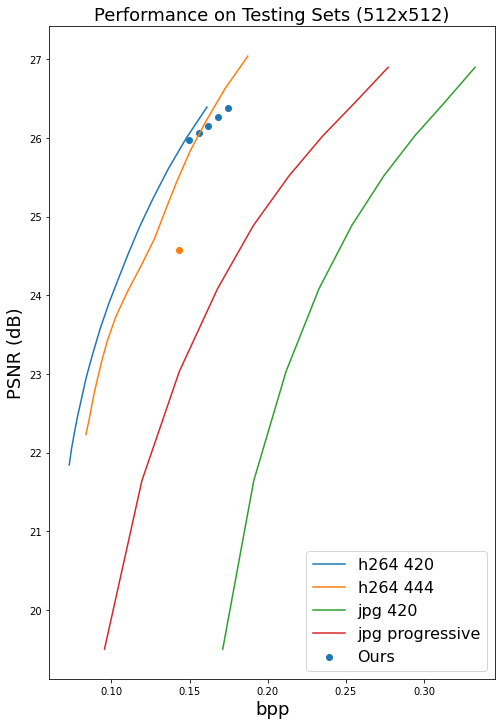

In [39]:
with open(root+'test_evl_512_color.pkl', 'rb') as f:
    d = pickle.load(f)
    
plt.figure(figsize=(8,12))
our = np.array([[0.14953736999999998, 25.98041],[0.15588897999999998, 26.06441],[0.16198511999999998, 26.15881],[0.16790252999999997, 26.26461],[0.17437225999999997, 26.3861]])
plot(d, 186)
plt.scatter(our[:, 0], our[:, 1], label='Ours')
plt.scatter(0.143442,24.57565)
plt.title('Performance on Testing Sets (512x512)',fontsize=18)
plt.xlabel('bpp',fontsize=18)
plt.ylabel('PSNR (dB)',fontsize=18)
plt.legend(prop={'size': 16})
plt.savefig('clic512.png')


plt.show()

In [43]:
   0.00503922+0.00000381+0.00001526+0.00016022+0.00130463+0.00659180+0.02757645+0.04583359+0.00127029+0.00000381+0.00001907+0.00018311+0.00157928+0.00701904+0.01939011+0.00130081+0.00000381+0.00001907+0.00036240+0.00196075+0.00605774+0.02211761+0.00032425+0.00001144+0.00003433+0.00043869+0.00158310+0.00636292+0.00008011+0.00001144+0.00006866+0.00044250+0.00164795+0.00001907+0.00001526+0.00009537+0.00045395


0.15940092000000003